In [1]:
import glob
import json
import pandas as pd

In [2]:
dicts = []
for p in glob.glob(r"art-mid-variance\*.result.json"):
# for p in glob.glob(r"C:\Users\tatsuya\PycharmProjects\wine\*.result.json"):

    with open(p,mode="r",encoding="utf-8") as f:
        try:
            dicts.append(json.load(f))
        except:
            pass

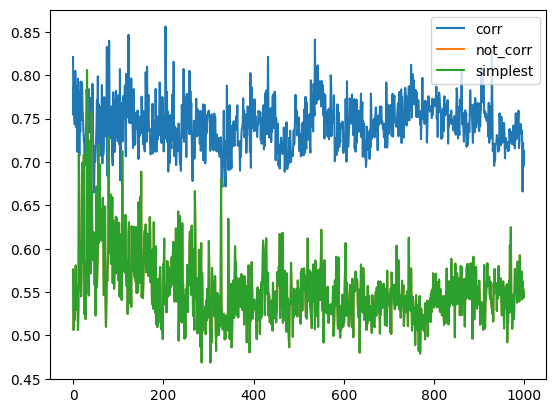

In [3]:
import matplotlib.pyplot as plt
import copy
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
simplest_dicts = [d for d in dicts_virgin if (not d["corr"])&(d["aggregate"]=="simple_agg")&(d["freezing"]==0)&(not d["weighted_learn"])]
simplest = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in simplest_dicts],axis=1).median(axis=1)

dicts_virgin = copy.deepcopy(dicts)

fig,ax =  plt.subplots(1,1)
dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]

# dicts_virgin = [d for d in dicts_virgin if d["aggregate"]=="simple_agg"]
# dicts_virgin = [d for d in dicts_virgin if d["freezing"]]
# corr_dicts = [d for d in dicts_virgin if not d["aggregate"]=="simple_agg"]
# not_dicts = [d for d in dicts_virgin if d["aggregate"]=="simple_agg"]
corr_dicts = [d for d in dicts_virgin if (d["corr"]&d["corr_abs"])]
not_dicts = [d for d in dicts_virgin if not  (d["corr"]&d["corr_abs"])]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in corr_dicts],axis=1)
# corr_mean = pd.concat([pd.DataFrame(d["indicators"])["new_weighted_testLoss"] for d in corr_dicts],axis=1)

corr_mean = corr_mean.median(axis=1,skipna=True)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean.median(axis=1,skipna=True)

corr_mean.plot(label = "corr")
not_mean.plot(label = "not_corr")

simplest.plot(label = "simplest")

# plt.yscale('log')





plt.legend()
# for d in dicts_virgin:
#     # corr = d["corr"]&d["corr_abs"]
    
#     df = pd.DataFrame(d["indicators"])["simple_testLoss"]
#     df = df.loc[df.values < 1]
#     ax.plot(df,color = "red" if corr else "blue")




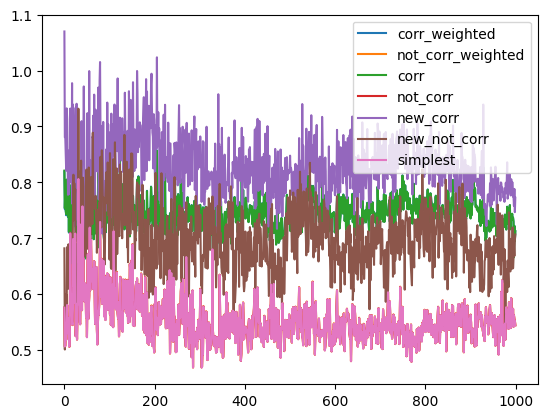

In [4]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)

fig,ax =  plt.subplots(1,1,sharey=True)


# dicts_virgin = [d for d in dicts_virgin if d["aggregate"]=="weight_and_pred"]


corr_dicts = [d for d in dicts_virgin if d["corr_abs"]&d["corr"]]
not_dicts = [d for d in dicts_virgin if not  d["corr_abs"]&d["corr"]]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["weighted_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean.median(axis=1)

not_mean = pd.concat([pd.DataFrame(d["indicators"])["weighted_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean.median(axis=1)

corr_mean.plot(label = "corr_weighted")
not_mean.plot(label = "not_corr_weighted")

corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean.median(axis=1)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean.median(axis=1)

corr_mean.plot(label = "corr")
not_mean.plot(label = "not_corr")

corr_mean = pd.concat([pd.DataFrame(d["indicators"])["new_weighted_testLoss"] for d in corr_dicts],axis=1)
corr_mean = corr_mean.median(axis=1)
not_mean = pd.concat([pd.DataFrame(d["indicators"])["new_weighted_testLoss"] for d in not_dicts],axis=1)
not_mean = not_mean.median(axis=1)

corr_mean.plot(label = "new_corr")
not_mean.plot(label = "new_not_corr")

simplest.plot(label = "simplest")


plt.legend()
# for d in dicts_virgin:
#     # corr = d["corr"]&d["corr_abs"]
    
#     df = pd.DataFrame(d["indicators"])["simple_testLoss"]
#     df = df.loc[df.values < 1]
#     ax.plot(df,color = "red" if corr else "blue")




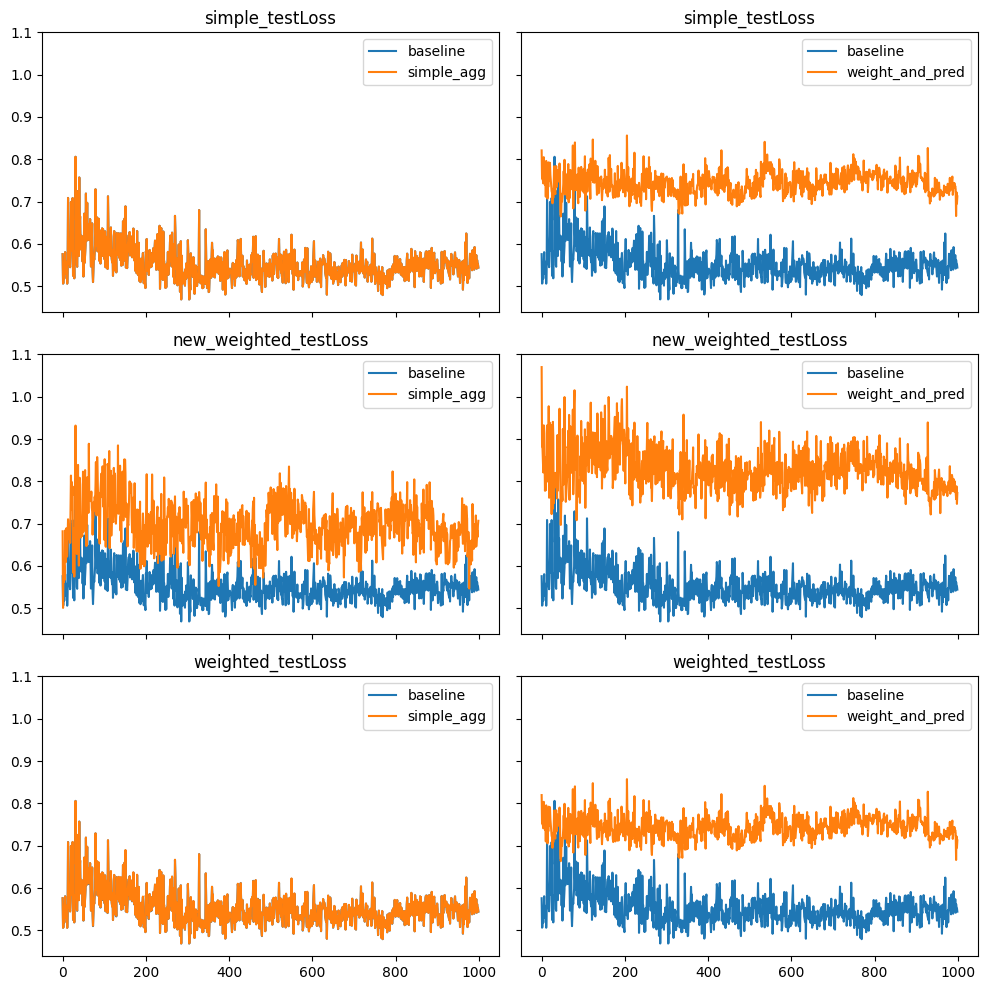

In [5]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]


fig,ax =  plt.subplots(3,2,sharey=True,sharex=True)
fig.set_size_inches(10,10)
# fig, ax = plt.subplots(3, 2, sharey=True)
# fig.set_size_inches(10, 10)
aggs = sorted(list(set([d["aggregate"] for d in dicts_virgin])))

for corr in [0, 1]:
    for pred_i, pred in enumerate(["simple_testLoss", "new_weighted_testLoss", "weighted_testLoss"]):
        simplest.plot(ax=ax[pred_i,corr],label = "baseline")
        for agg in aggs:
            ax[pred_i, corr].set_title(pred)
    
            targets = [d for d in dicts_virgin if (d["aggregate"] == agg) & (d["corr"] == corr) & (d["corr_abs"] == corr)]
            if not targets:
                continue
            corr_mean = pd.concat([pd.DataFrame(d["indicators"])[pred] for d in targets], axis=1)
            # corr_mean = corr_mean[corr_mean<1].median(axis=1)
            corr_mean = corr_mean.median(axis=1)
            # corr_mean.plot(label=agg + " " + pred, ax=ax[pred_i, corr])
            corr_mean.plot(label=agg, ax=ax[pred_i, corr])
            ax[pred_i,corr].legend()
            # ax[pred_i, corr].legend()
# ax[0, 0].set_title(f"{aggs[0]}, Corr 0")
# ax[0, 1].set_title(f"{aggs[0]}, Corr 1")
# ax[1, 0].set_title(f"{aggs[1]}, Corr 0")
# ax[1, 1].set_title(f"{aggs[1]}, Corr 1")
# ax[2, 0].set_title(f"{aggs[2]}, Corr 0")
# ax[2, 1].set_title(f"{aggs[2]}, Corr 1")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()


4
7
4
7


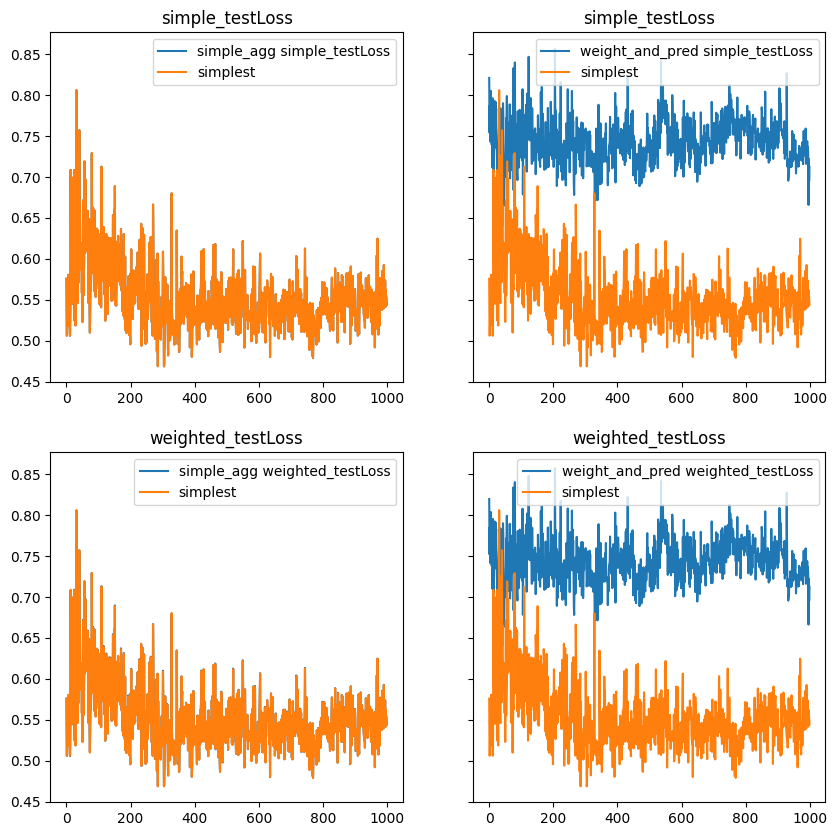

In [6]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
# dicts_virgin = [d for d in dicts_virgin if not d["weighted_learn"]]
# dicts_virgin = [d for d in dicts_virgin if d["weighted_learn"]]

fig,ax =  plt.subplots(2,2,sharey=True)
fig.set_size_inches(10,10)

aggs = set([d["aggregate"] for d in dicts_virgin])
# for pred_i,pred in enumerate(["simple_testLoss","new_weighted_testLoss","weighted_testLoss"]):
for pred_i,pred in enumerate(["simple_testLoss","weighted_testLoss"]):
    for agg in aggs:
        for corr in [0,1]:
            # targets = [d for d in dicts_virgin if (d["aggregate"]==agg)&(d["corr"]==corr)&(d["corr_abs"]==corr)]
            targets = [d for d in dicts_virgin if (d["aggregate"]==agg)&(d["corr"]==corr)&(d["corr_abs"]==corr)]
            if not targets:
                continue
            print(len(targets))
            corr_mean = pd.concat([pd.DataFrame(d["indicators"])[pred] for d in targets],axis=1)
            # corr_mean = corr_mean[corr_mean<1]
            corr_mean = corr_mean.median(axis=1)
            corr_mean.plot(label=agg +" " +  pred,ax= ax[pred_i,corr])
            ax[pred_i,corr].set_title(pred)
for pred_i,pred in enumerate(["simple_testLoss","weighted_testLoss"]):
    for corr in [0,1]:
        simplest.plot(ax=ax[pred_i,corr],label = "simplest")  
        ax[pred_i,corr].legend()
      
plt.legend()

<Axes: >

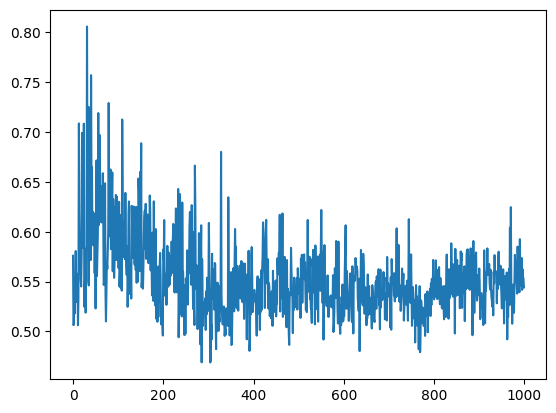

In [7]:
import matplotlib.pyplot as plt
import copy

dicts_virgin = copy.deepcopy(dicts)
simplest_dicts = [d for d in dicts_virgin if (not d["corr"])&(d["aggregate"]=="simple_agg")&(d["freezing"]==0)&(not d["weighted_learn"])]
corr_mean = pd.concat([pd.DataFrame(d["indicators"])["simple_testLoss"] for d in simplest_dicts],axis=1).median(axis=1)
corr_mean.plot()